![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [37]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## **EDA & Standardizing Data**

In [38]:
print(penguins_df.isna().sum())
print(penguins_df.columns)

penguins_df_dummy = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

scaler = StandardScaler()
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df_dummy[numerical_columns] = scaler.fit_transform(penguins_df_dummy[numerical_columns])
penguins_df_dummy

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
3,-1.344738,1.096901,-0.569105,-0.939551,0
4,-0.867170,1.761074,-0.783164,-0.691149,1
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,0
328,0.510432,-1.457611,1.000662,0.799264,0
329,1.171681,-0.742347,1.500134,1.917074,1
330,0.216543,-1.202160,0.786603,1.233968,0


## **Finding The Best Parameter For Clusters**

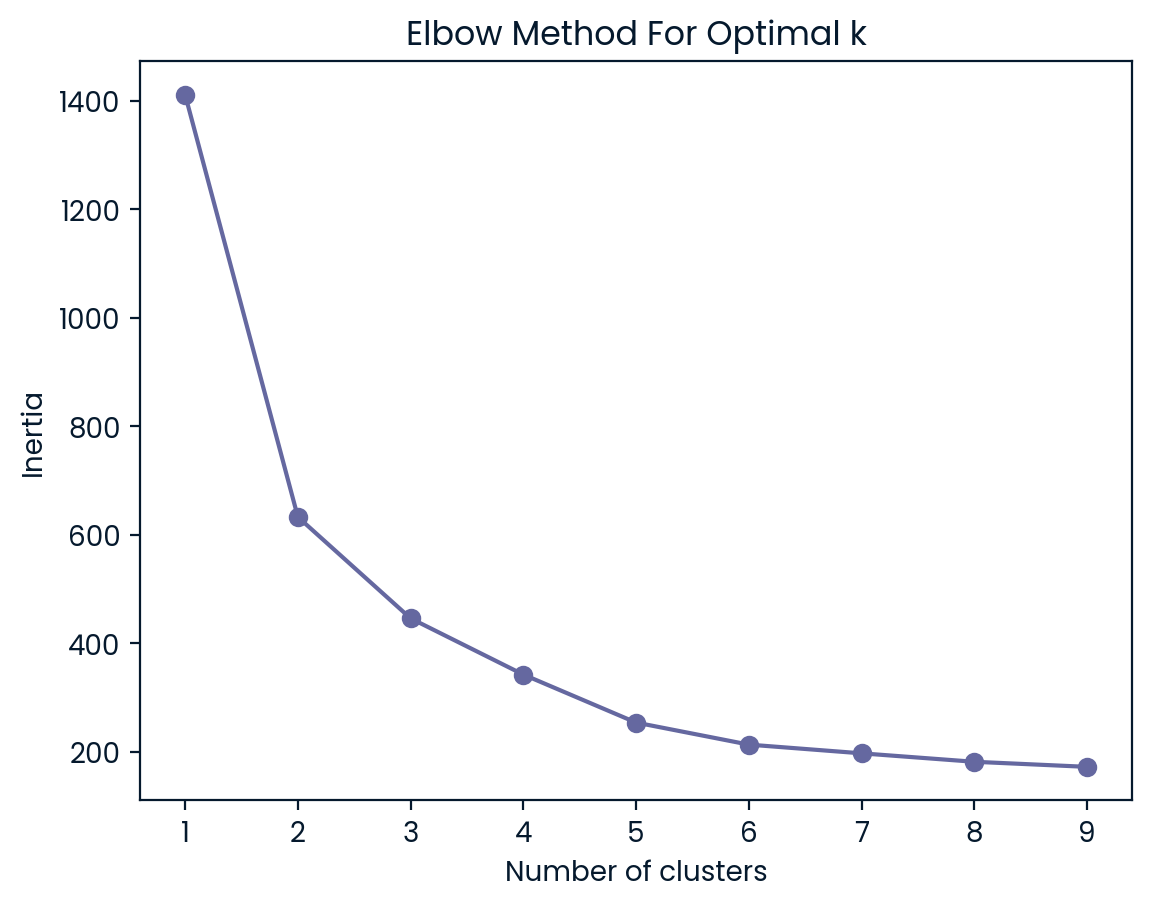

In [39]:
inertia = []
for i in range(1, 10):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(penguins_df_dummy)
    inertia.append(kmean.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## **Clustering The Data**

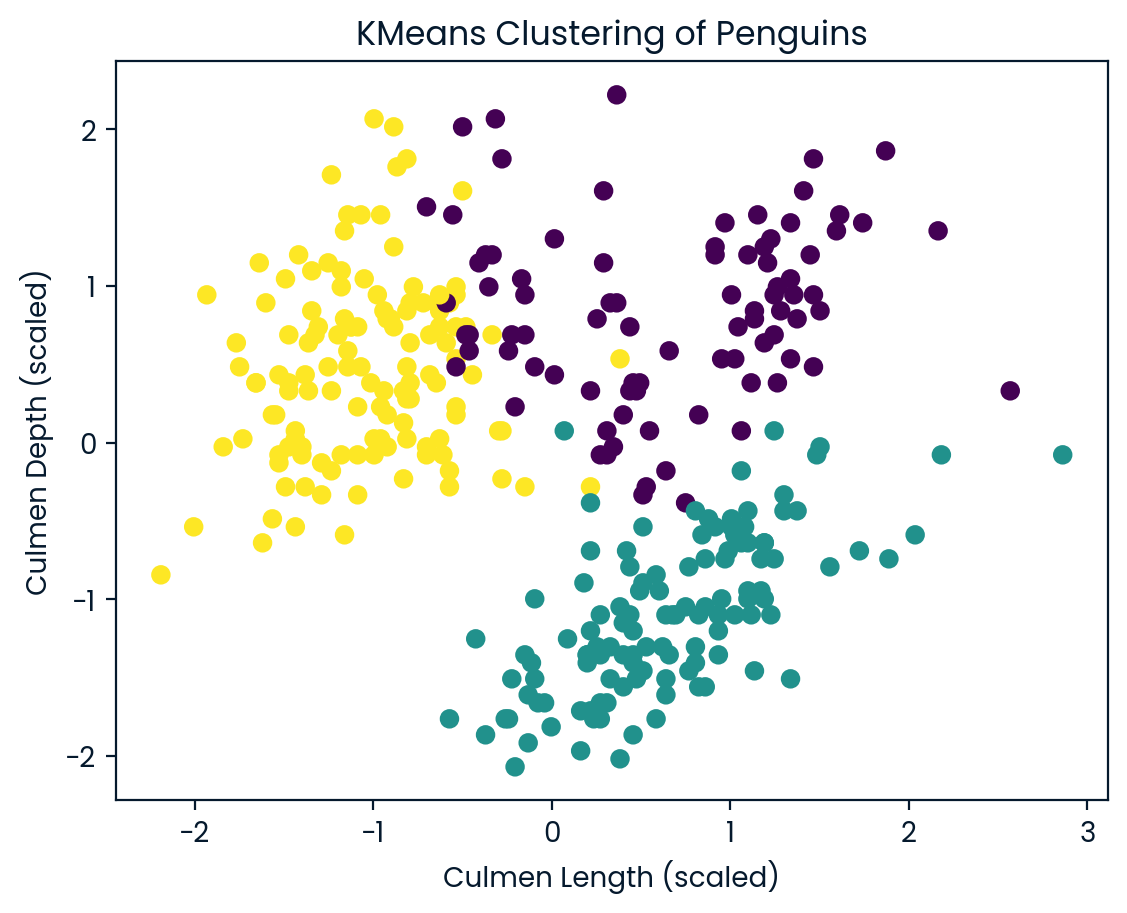

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_df_dummy)

plt.scatter(penguins_df_dummy['culmen_length_mm'], penguins_df_dummy['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Culmen Length (scaled)')
plt.ylabel('Culmen Depth (scaled)')
plt.title('KMeans Clustering of Penguins')
plt.show()

## **Clustered Data In An Separate DataFrame**

In [41]:
penguins_df['cluster'] = kmeans.labels_
stat_penguins = penguins_df.groupby('cluster').mean()
stat_penguins['count'] = penguins_df['cluster'].value_counts()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,count
cluster,,,,,
0,47.477907,18.787209,197.279070,3918.604651,86
1,47.568067,14.996639,217.235294,5092.436975,119
2,38.356693,18.066929,188.244094,3571.259843,127
